<a href="https://colab.research.google.com/github/Alexandre77777/data_mining/blob/main/1.%20%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0/4.%20%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_(Matplotlib_Seaborn_Pandas)_%D0%A7%D0%B0%D1%81%D1%82%D1%8C_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практика. Визуальный анализ данных (Matplotlib/Seaborn/Pandas). Часть 2


1. Скачайте этот блокнот к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём репозитории.

#### Полезная литература
- [**Блокнот с теорией**](https://colab.research.google.com/github/Alexandre77777/data_mining/blob/main/1.%20%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5/%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F/3.%20%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F_Matplotlib_Seaborn_Plotly.ipynb)
- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [62]:
#!pip install seaborn==0.11.0
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
colab = False # если работаете на своём компьютере, поставьте False
if colab:
    from google.colab import drive
    drive.mount('/content/drive')

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета результатов экзаменов студентов  https://www.kaggle.com/spscientist/students-performance-in-exams.

In [6]:
if colab:
    df = pd.read_csv('/content/drive/My Drive/Data/StudentsPerformance.csv')
else:
    df = pd.read_csv("../data/StudentsPerformance.csv")

df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## Задания
#### 1. Постройте 3 графика, показывающих распределение результатов экзаменов (каждый график на предмет).


Графики должны быть в одном ряду и у них должен быть общий заголовок "Результаты экзаменов".

Для результатов каждого экзамена посчитайте медианные значения.


/home/thego/miniconda3/envs/numpy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/thego/miniconda3/envs/numpy/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/thego/miniconda3/envs/numpy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/thego/miniconda3/envs/numpy/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

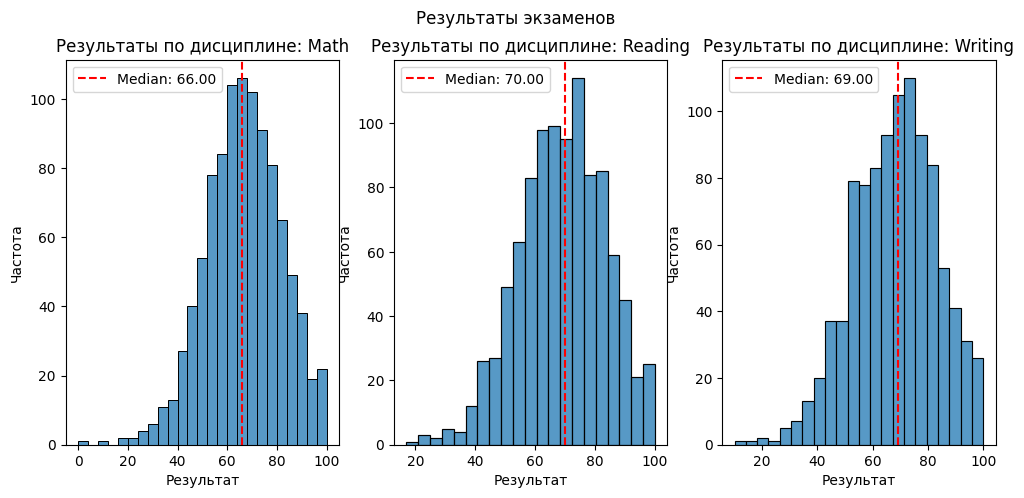

In [27]:
st = df.copy()

f, ax = plt.subplots(1, 3, figsize=(12, 5))

subjects = {
    'math score': 'Math', 
    'reading score': 'Reading', 
    'writing score': 'Writing'
}

for i, (subj_key, subj_value) in enumerate(subjects.items()):
    sns.histplot(st[subj_key], ax=ax[i])
    median = st[subj_key].median()
    ax[i].axvline(median, color='red', linestyle='--', label=f'Median: {median:.2f}')
    ax[i].set_title(f'Результаты по дисциплине: {subj_value}')
    ax[i].set_xlabel('Результат')
    ax[i].set_ylabel('Частота')
    ax[i].legend()

plt.suptitle('Результаты экзаменов')
plt.show()

#### 2. Образование родителей
Какие уровни образования есть в столбце *'parental level of education'* и сколько строк в датафрейме соответствует каждому уровню?

Постройте график и ответьте на вопрос ниже

Отличаются ли баллы по математике у детей с разным образованием родителей?
Постройте график, где по оси Х находятся уровни образования родителей, а по У - баллы по математике.


/home/thego/miniconda3/envs/numpy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/thego/miniconda3/envs/numpy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/thego/miniconda3/envs/numpy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/thego/miniconda3/envs/numpy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

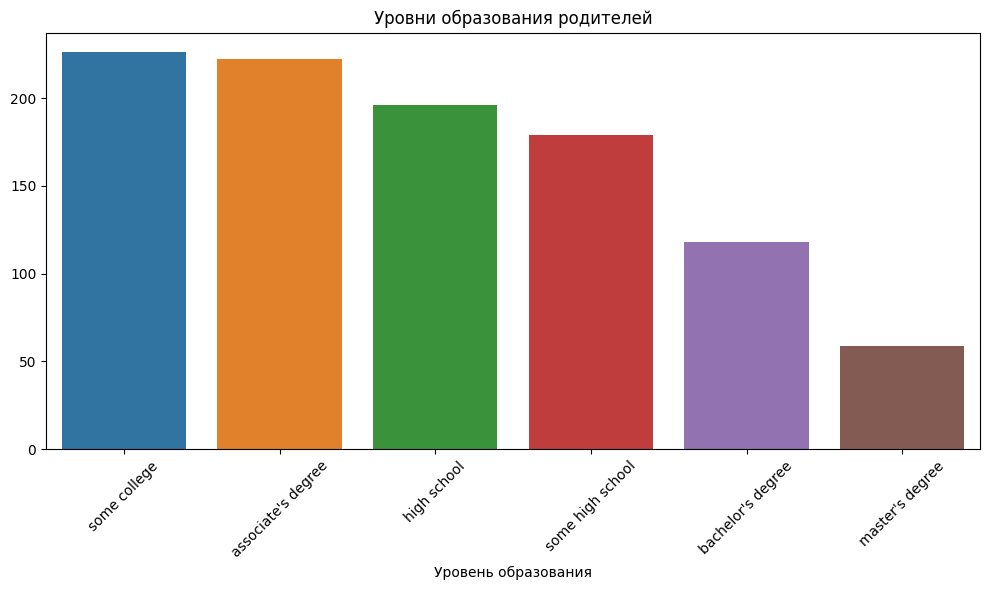

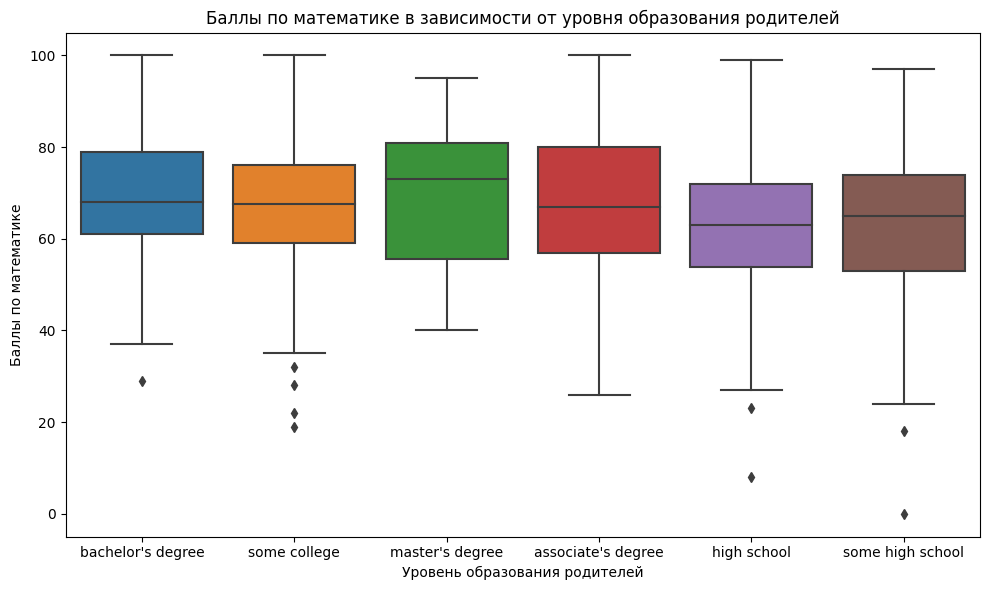

In [31]:
education_counts = st['parental level of education'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=education_counts.index, y=education_counts.values)
plt.title('Уровни образования родителей')
plt.xlabel('Уровень образования')
plt.xticks(rotation=45)
plt.tight_layout()

plt.figure(figsize=(10, 6))
sns.boxplot(data=st, x='parental level of education', y='math score')
plt.title('Баллы по математике в зависимости от уровня образования родителей')
plt.xlabel('Уровень образования родителей')
plt.ylabel('Баллы по математике')
plt.tight_layout()
plt.show()

Ответ: в среднем нет сильной корелляции между образованием родителей и результатами детей по экзаменам. Хотя у родителей, закончивших "некий колледж", больше всего детей, которые сдали экзамен заметно хуже среднего.
А у родителей со школьным образованием и вовсе встречались случаи полного провала экзамена.

#### 3. Выведите число студенток, набравших больше 90 баллов по всем предметам.


In [35]:
df[
    (df['gender'] == 'female') & 
    (df['math score'] > 90) & 
    (df['reading score'] > 90) & 
    (df['writing score'] > 90)
]['gender'].count()

17

#### 4. Сравните баллы у студентов разных полов. Используя agg() выведите минимальное, максимальное и медианное значение


In [36]:
df.groupby('gender').agg({
    'math score': ['min', 'max', 'median'],
    'reading score': ['min', 'max', 'median'],
    'writing score': ['min', 'max', 'median']
})

math score             reading score             writing score       \
              min  max median           min  max median           min  max   
gender                                                                       
female          0  100   65.0            17  100   73.0            10  100   
male           27  100   69.0            23  100   66.0            15  100   

               
       median  
gender         
female   74.0  
male     64.0

#### 5. Выясните, влияет ли обед и подготовка к тесту на средний балл студентов разного пола
###### (подсказка: используете agg())

In [41]:
gender_lunch_scores = df.groupby(['gender', 'lunch'])[['math score', 'reading score', 'writing score']].mean()
gender_prep_scores = df.groupby(['gender', 'test preparation course'])[['math score', 'reading score', 'writing score']].mean()

In [42]:
# Средний балл по полу и типу обеда
gender_lunch_scores

math score  reading score  writing score
gender lunch                                                 
female free/reduced   55.814815      67.386243      66.444444
       standard       68.124620      75.607903      75.927052
male   free/reduced   62.457831      61.542169      59.126506
       standard       72.022152      67.537975      65.509494

Ответ: обед **влияет** на результаты теста

In [40]:
# Средний балл по полу и подготовке к тесту
gender_prep_scores

math score  reading score  writing score
gender test preparation course                                          
female completed                 67.195652      77.375000      78.793478
       none                      61.670659      69.982036      68.982036
male   completed                 72.339080      70.212644      69.793103
       none                      66.688312      62.795455      59.649351

Ответ: подготовка **влияет** на результаты теста

#### 6. Постройте график, показывающий зависимость уровня образования родителей от их расы

/home/thego/miniconda3/envs/numpy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/thego/miniconda3/envs/numpy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/thego/miniconda3/envs/numpy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/thego/miniconda3/envs/numpy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

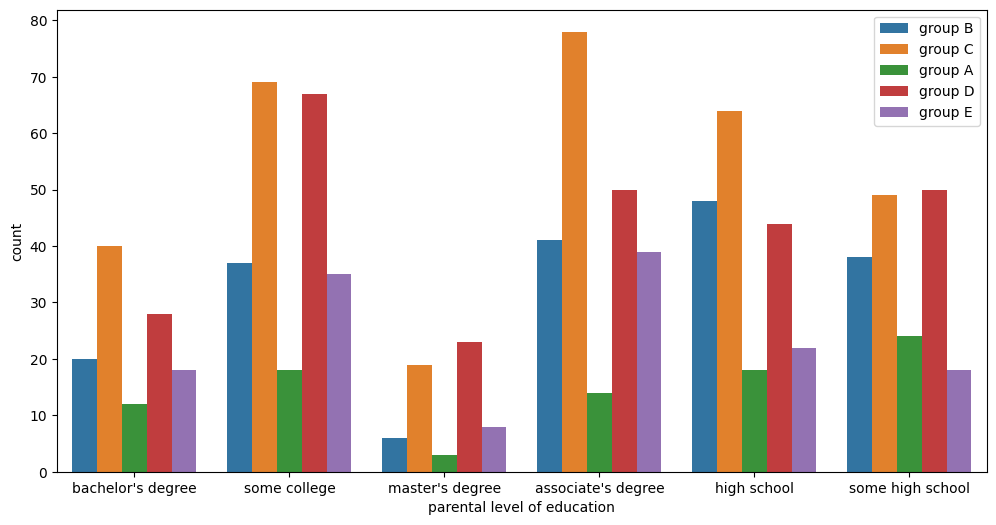

In [47]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='parental level of education', hue='race/ethnicity')
plt.legend()
plt.show()

#### 7. Постройте график, показывающий зависимость прохождения подготовительного теста от уровня образования родителей.


Кто чаще ходит на курсы: дети, родители которых закончили только старшую школу, или дети, чьи родители получили степень бакалавра\магистра?

/home/thego/miniconda3/envs/numpy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/thego/miniconda3/envs/numpy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/thego/miniconda3/envs/numpy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/thego/miniconda3/envs/numpy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

<Axes: xlabel='parental level of education', ylabel='count'>

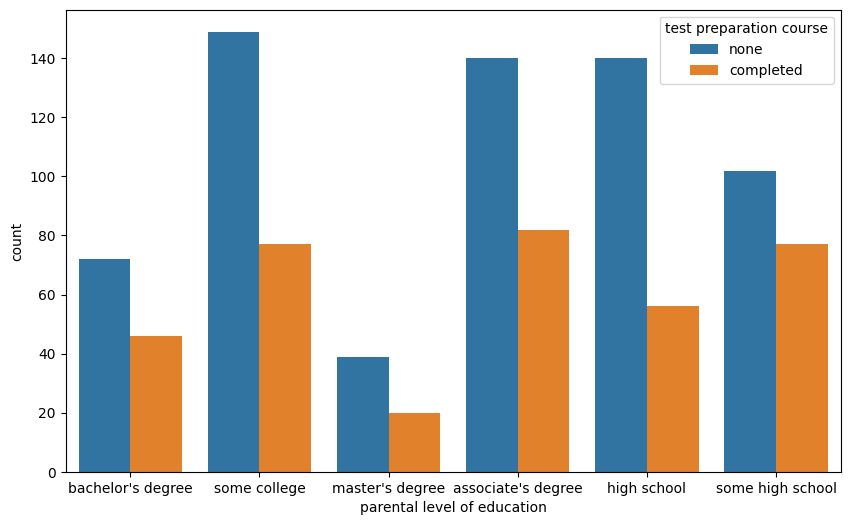

In [48]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='parental level of education', hue='test preparation course')

Ответ: чаще на курсы ходят те, у кого родители закончили только старшую школу

#### 8. Постройте plot.pie, показывающий, сколько людей сдали\не сдали экзамен по математике.

Сдавшим считается человек, набравший 40 баллов.

###### Подсказка: создайте столбец в датафрейме, который содержит результат сдачи (сдал или не сдал)

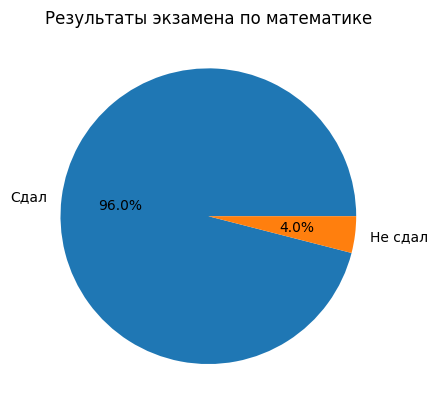

In [60]:
passed = (st['math score'] >= 40).sum()
failed = len(df) - passed

plt.pie([passed, failed], labels=['Сдал', 'Не сдал'], autopct='%1.1f%%')
plt.title('Результаты экзамена по математике')
plt.show()

#### 9. Постройте plot.pie, показывающий распределение студентов по оценкам

Оценки студентов выставляются по шкале:<br>
0  - 40 marks : grade E<br>
41 - 60 marks : grade D<br>
60 - 70 marks : grade C<br>
70 - 80 marks : grade B<br>
80 - 90 marks : grade A<br>
90 - 100 marks : grade O<br>

Для этого посчитайте сумму результатов за 3 экзамена и найдите среднее. Оценка выставляется по среднему значению. Если студент не сдал математику(даже если средний балл выше 40), он получает Е

In [86]:
def generate_grades(column):
    return np.select(
        [
            column.between(0.0, 40.0),
            column.between(40.0, 60.0),
            column.between(60.0, 70.0),
            column.between(70.0, 80.0),
            column.between(80.0, 90.0),
            column.between(90.0, 100.0),
        ], [
            'E',
            'D',
            'C',
            'B',
            'A',
            'O'
        ]
    )

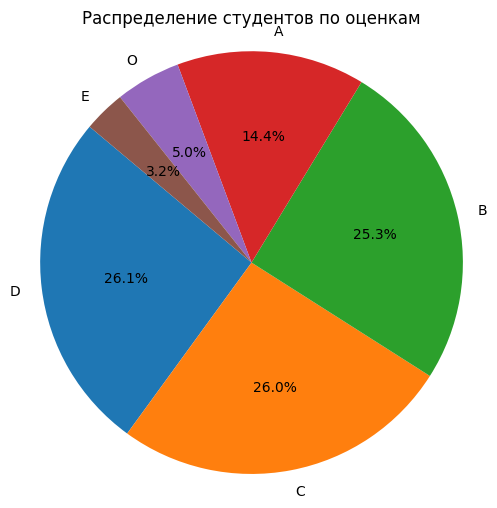

In [87]:
st = df.copy()

st['average score'] = st[['math score', 'reading score', 'writing score']].mean(axis=1)
st['grade'] = generate_grades(st['average score'])

grade_counts = st['grade'].value_counts()

data = grade_counts.values
labels = grade_counts.index

plt.figure(figsize=(6, 6))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Распределение студентов по оценкам')
plt.axis('equal')  
plt.show()

#### 10. Постройте countplot, показывающий зависимость между итоговой оценкой студентов и его полом. Студенты какого пола получили больше оценок О, А, В

/home/thego/miniconda3/envs/numpy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/thego/miniconda3/envs/numpy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/thego/miniconda3/envs/numpy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


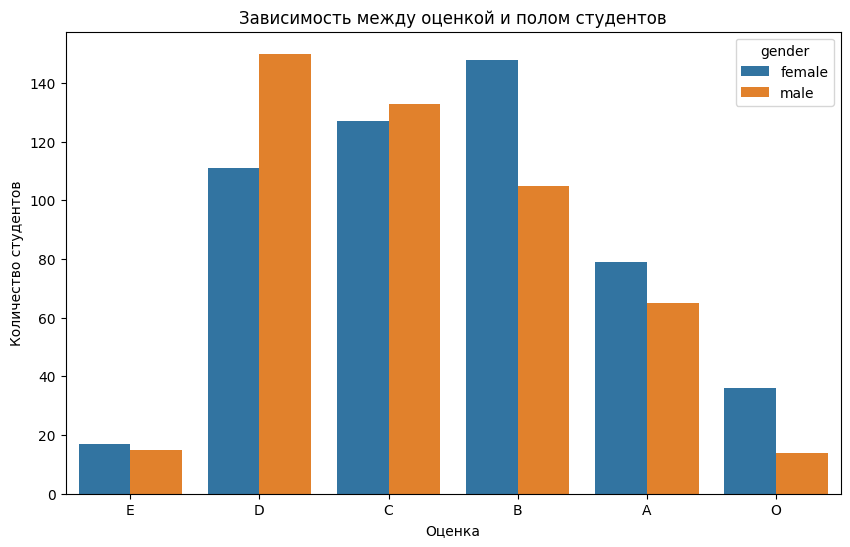

In [88]:
plt.figure(figsize=(10, 6))
sns.countplot(data=st, x='grade', hue='gender', order=['E', 'D', 'C', 'B', 'A', 'O'])
plt.title('Зависимость между оценкой и полом студентов')
plt.xlabel('Оценка')
plt.ylabel('Количество студентов')
plt.show()

Ответ: women